In [1]:
cd("../")                             

In [2]:

using Pkg
if isfile("Project.toml") && isfile("Manifest.toml")
    Pkg.activate(".")
end

# Pkg.instantiate()

#FIXME make the including and using clean. you are including usings in irrelevant files. also including with revise you can check it including only one file and see it is running independently and then continue
using IJulia


using Revise
includet("../src/quantile_transformation.jl")
includet("../src/evaluation/evaluation.jl")
includet("../src/GLM.jl")
includet("../src/structs.jl")
includet("../src/load_data.jl")
includet("../visualization/visualization.jl")


  Activating environment at `~/Documents/Project_PTVAE/progs/github_repo/LatentSubgroups/Project.toml`


# Simulation Design

## CART-based utility metric

### pre-transformation VAE

In [25]:
path_sim = "runs/run_397"

# path = "runs/run_149"
# utility(path)


ptvae_syn_sim = Matrix(CSV.read("./runs/run_397/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, ptvae_syn_sim)

(0.08379050535034331, 1.9027170673672547, 4.804678834934327)

### (50 quantile) pre-transformation VAE

In [24]:
path_ist = "runs/run_427"


q50_ptvae_syn_ist = Matrix(CSV.read("./runs/run_427/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, q50_ptvae_syn_ist)

(0.053381952828937165, 1.2194131087627453, 1.4157928422345787)

### (100 quantile) pre-transformation VAE

In [26]:
path_sim = "runs/run_428"

# path = "runs/run_149"
# utility(path)


q100_ptvae_syn_sim = Matrix(CSV.read("./runs/run_428/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, q100_ptvae_syn_sim)

(0.03202591293185484, 0.7404226040994099, -1.553946340218747)

### (10 quantile) pre-transformation VAE

In [27]:
path_sim = "runs/run_442"

# path = "runs/run_149"
# utility(path)


q10_ptvae_syn_sim = Matrix(CSV.read("./runs/run_442/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, q10_ptvae_syn_sim)

(0.21413190370548885, 5.525442924745714, 23.933940393589875)

### standard VAE

In [28]:
vae_syn_sim = Matrix(CSV.read("./runs/run_398/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, vae_syn_sim)

(0.11879389212304516, 2.736524780745013, 8.640838395620728)

### QVAE

In [29]:
qvae_syn_sim = Matrix(CSV.read("./runs/run_399/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_sim, nothing, qvae_syn_sim)

(0.11742876412374856, 2.7386637686160324, 9.472396360697923)

### Norta-J

In [30]:
nortaj_syn_sim = Matrix(CSV.read("./Norta-J/202311_sim_method4.csv" , DataFrame, header = true))[:,2:end]
utility(path_sim, nothing, nortaj_syn_sim)

(0.09693283665493686, 2.166838879480512, 7.084278310673177)

### GAN

In [9]:
gan_syn_sim = Matrix(CSV.read("./GAN/runs/run_1/gan/synthetic_data.csv" , DataFrame, header = false))
utility(path_sim, nothing, gan_syn_sim)

(0.17616228772518766, 4.181152901879555, 15.285885790567734)

## density diagrams

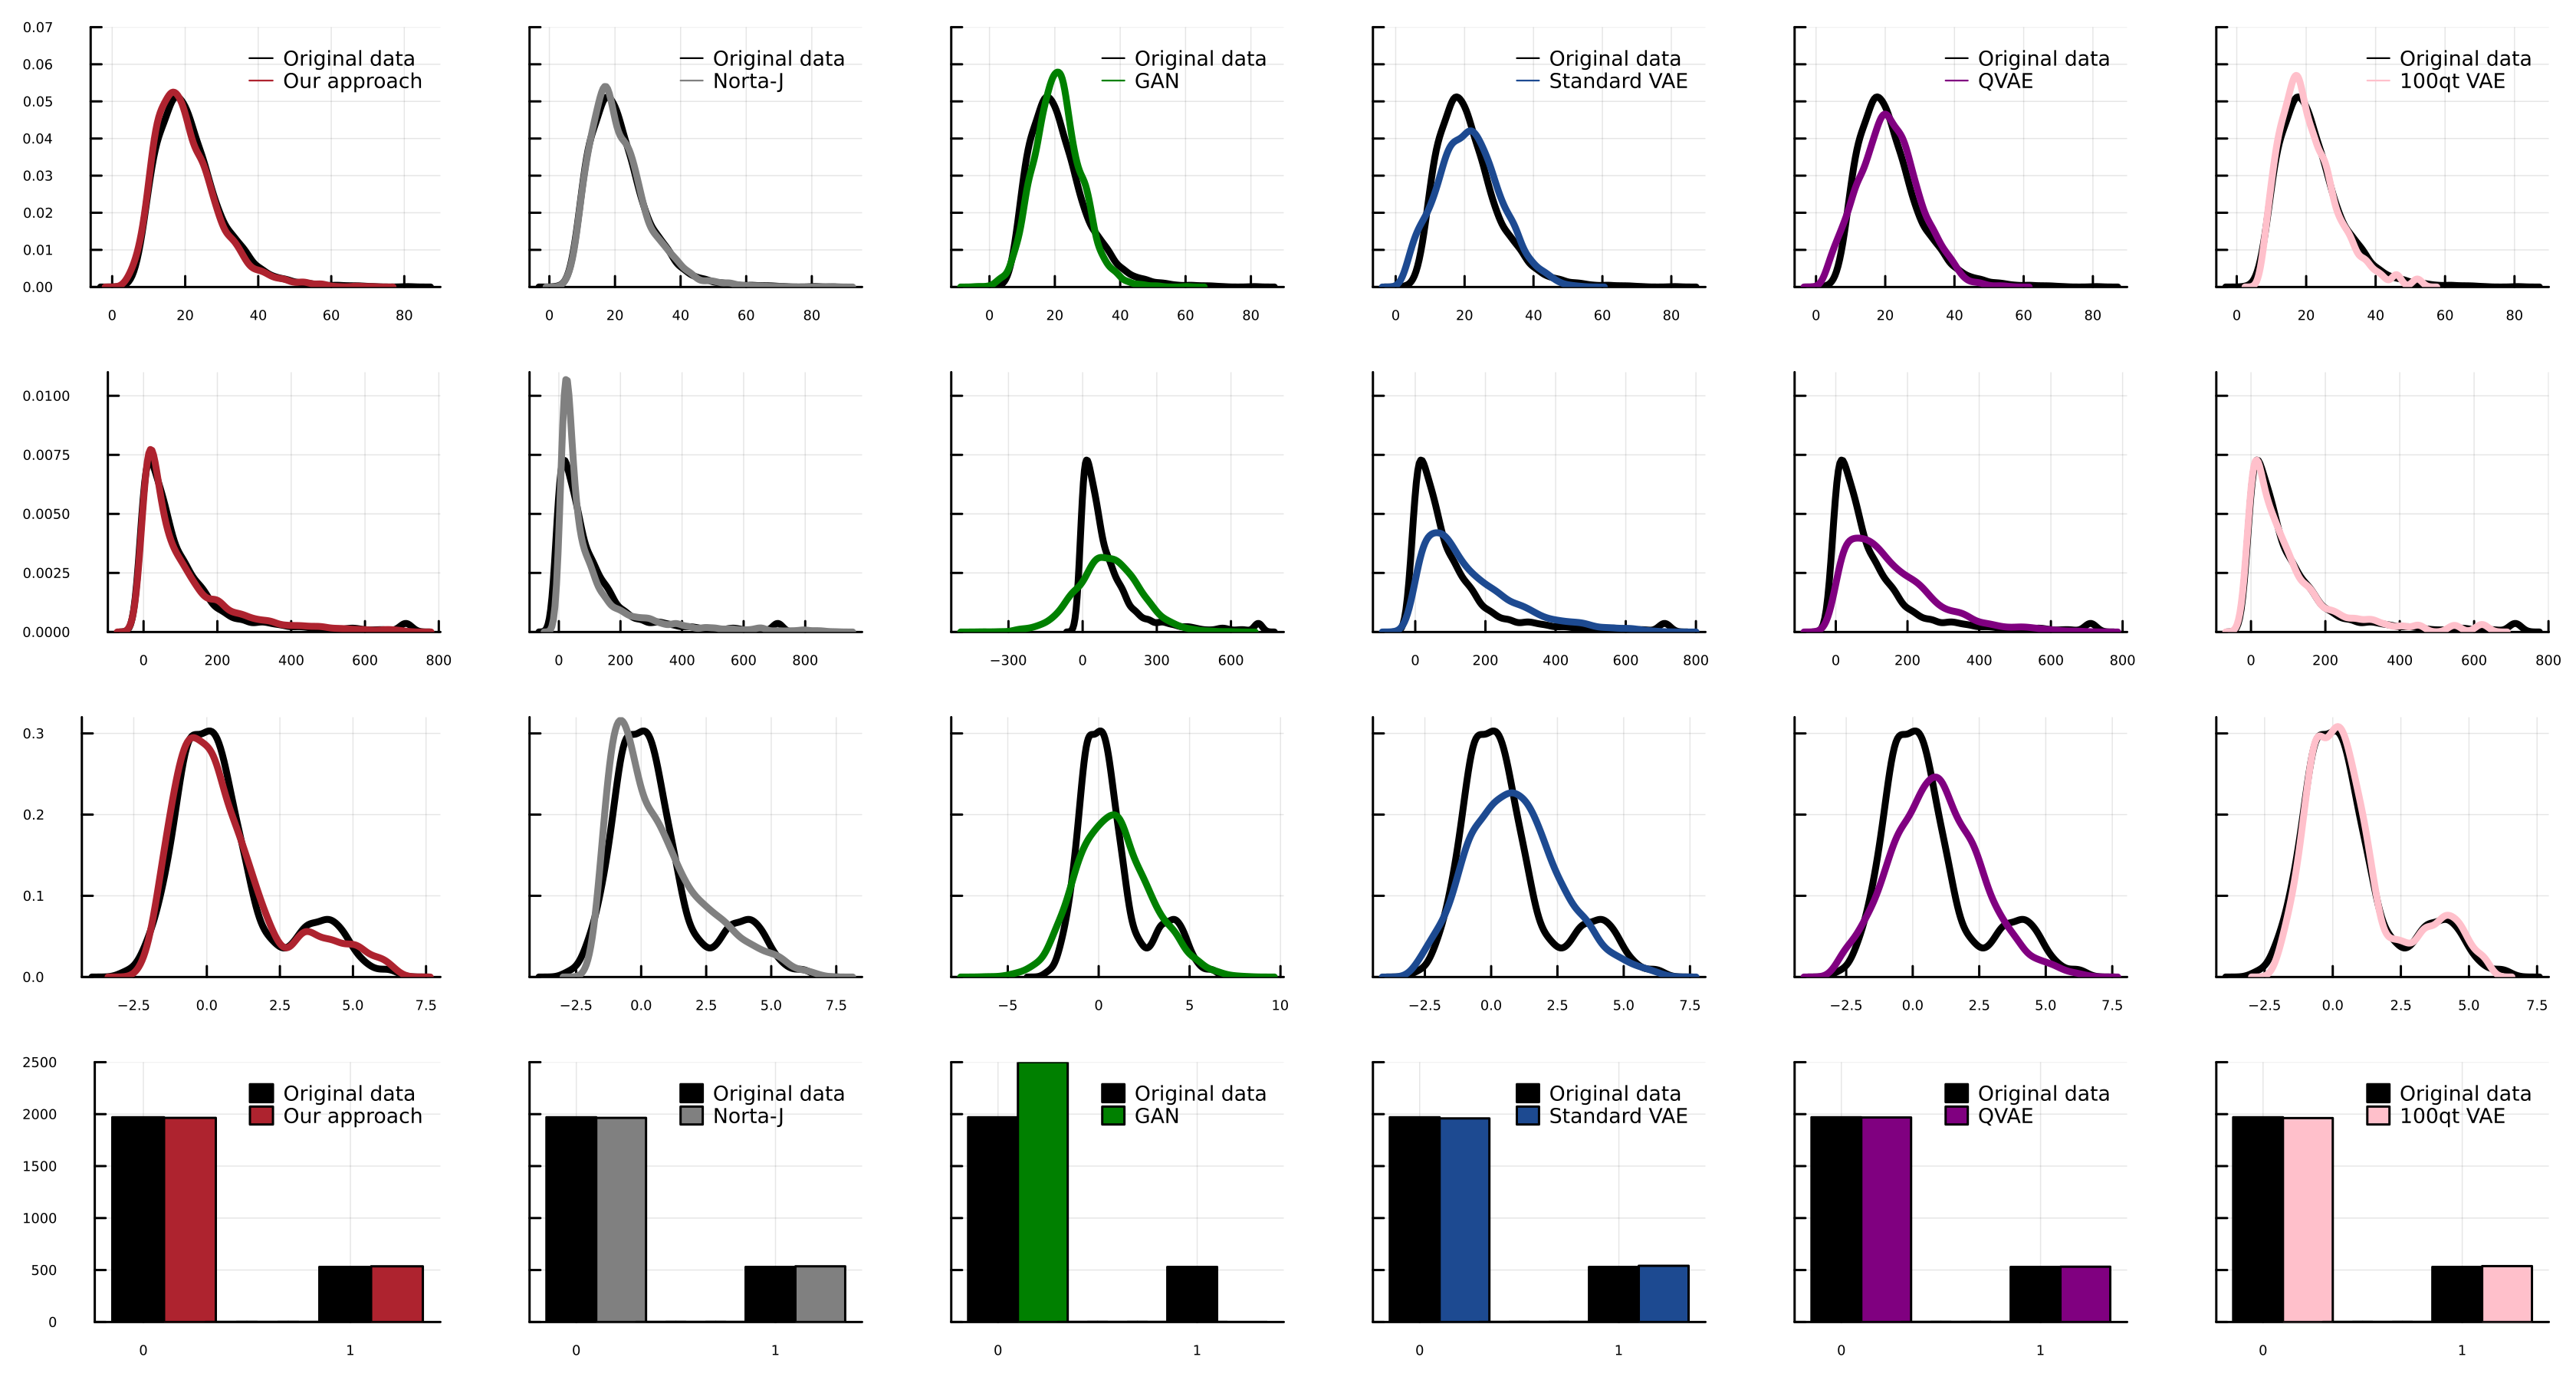

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/LatentSubgroups/figures/sim_marginal_with_q.pdf"

In [10]:
original_data_sim = Matrix(CSV.read("./data/simulation.csv" , DataFrame))
colnames_sim = names(CSV.read("./data/simulation.csv" , DataFrame))



dim_number_sim = 3
dim_name_sim = colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim = (0, 0.07))
Plots.density!(p1, ptvae_syn_sim[:,dim_number_sim], label = " Our approach", color = "#AE232F", width = 3, linestyle = :solid, ylim =(0, 0.07))

p2 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p2, nortaj_syn_sim[:,dim_number_sim], label = " Norta-J", color = "gray", width = 3, linestyle = :solid, ylim =(0, 0.07), yformatter=_->"")

p3 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p3, gan_syn_sim[:,dim_number_sim], label = " GAN", color = "green", width = 3,ylim = (0, 0.07), legend = :top, yformatter=_->"")

p4 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p4, vae_syn_sim[:,dim_number_sim], label = " Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid,ylim = (0, 0.07), yformatter=_->"")

p5 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p5, qvae_syn_sim[:,dim_number_sim], label = " QVAE", color = "purple", width = 3, ylim =(0, 0.07), yformatter=_->"")

p6 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p6, q100_ptvae_syn_sim[:,dim_number_sim], label = " 100qt VAE", color = "pink", width = 3, ylim =(0, 0.07), yformatter=_->"")

p7 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p7, q10_ptvae_syn_sim[:,dim_number_sim], label = " 10qt VAE", color = "teal", width = 3, ylim =(0, 0.07), yformatter=_->"")

# Combine plots into a single row
combined_plot = Plots.plot(p1, p2, p3, p4, p5, p6, layout = (1, 6), size = (1120, 200),  legend = :best)



dim_number_sim = 8
dim_name_sim = colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.011))
Plots.density!(p1, ptvae_syn_sim[:,dim_number_sim], label = " Our approach", color = "#AE232F", width = 3, linestyle = :solid, ylim =(0, 0.011), legend = false)

p2 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.011))
Plots.density!(p2, nortaj_syn_sim[:,dim_number_sim], label = " Norta-J", color = "gray", width = 3, linestyle = :solid, ylim =(0, 0.011), legend = false, yformatter=_->"")

p3 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.011))
Plots.density!(p3, gan_syn_sim[:,dim_number_sim], label = " GAN", color = "green", width = 3, ylim =(0, 0.011), legend = false, yformatter=_->"")

p4 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.011))
Plots.density!(p4, vae_syn_sim[:,dim_number_sim], label = " Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid,ylim = (0, 0.011), legend = false, yformatter=_->"")

p5 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.011))
Plots.density!(p5, qvae_syn_sim[:,dim_number_sim], label = " QVAE", color = "purple", width = 3, ylim =(0, 0.011), legend = false, yformatter=_->"")


p6 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p6, q100_ptvae_syn_sim[:,dim_number_sim], label = " 100qt VAE", color = "pink", width = 3, ylim =(0, 0.011), legend = false, yformatter=_->"")

p7 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p7, q10_ptvae_syn_sim[:,dim_number_sim], label = " 10qt VAE", color = "teal", width = 3, ylim =(0, 0.011), yformatter=_->"")

# Combine plots into a single row
combined_plot_1 = Plots.plot(p1, p2, p3, p4, p5, p6, layout = (1, 6), size =  (1120, 200))




dim_number_sim = 20
dim_name_sim = colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.32))
Plots.density!(p1, ptvae_syn_sim[:,dim_number_sim], label = " Our approach", color = "#AE232F", width = 3, linestyle = :solid, ylim =(0, 0.32))

p2 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.32))
Plots.density!(p2, nortaj_syn_sim[:,dim_number_sim], label = " Norta-J", color = "gray", width = 3, linestyle = :solid, ylim =(0, 0.32), yformatter=_->"")

p3 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.32))
Plots.density!(p3, gan_syn_sim[:,dim_number_sim], label = " GAN", color = "green", width = 3, ylim =(0, 0.32), yformatter=_->"")

p4 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.32))
Plots.density!(p4, vae_syn_sim[:,dim_number_sim], label = " Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid, ylim =(0, 0.32), yformatter=_->"")

p5 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3, ylim =(0, 0.32))
Plots.density!(p5, qvae_syn_sim[:,dim_number_sim], label = " QVAE", color = "purple", width = 3, ylim =(0, 0.32), yformatter=_->"")


p6 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p6, q100_ptvae_syn_sim[:,dim_number_sim], label = " 100qt VAE", color = "pink", width = 3, ylim =(0, 0.32), yformatter=_->"")

p7 = Plots.density(original_data_sim[:,dim_number_sim], label = " Original data" , color = "black", width = 3,ylim =(0, 0.07))
Plots.density!(p7, q10_ptvae_syn_sim[:,dim_number_sim], label = " 10qt VAE", color = "teal", width = 3, ylim =(0, 0.32), yformatter=_->"")

# Combine plots into a single row
combined_plot_2 = Plots.plot(p1, p2, p3, p4, p5, p6, layout = (1, 6), size = (1120, 200),  legend = false)






dim_number_sim = 21
dim_name_ist= colnames_sim[dim_number_sim]  # Assuming colnames is defined elsewhere

# Create individual plots

p1 = histogram_plot("", [original_data_sim[:,dim_number_sim], ptvae_syn_sim[:,dim_number_sim]], [" Original data" , " Our approach"], ["black" "#AE232F"], (0, 2500), true)

p2 = histogram_plot("",[original_data_sim[:,dim_number_sim], nortaj_syn_sim[:,dim_number_sim]], [" Original data" , " Norta-J"], ["black" "gray"], (0, 2500), false)

p3 = histogram_plot("",[original_data_sim[:,dim_number_sim], gan_syn_sim[:,dim_number_sim]], [" Original data" , " GAN"], ["black" "green"], (0, 2500), false)

p4 = histogram_plot("",[original_data_sim[:,dim_number_sim], vae_syn_sim[:,dim_number_sim]], [" Original data" , " Standard VAE"], ["black" "#1D4A91"], (0, 2500), false)

p5 = histogram_plot("",[original_data_sim[:,dim_number_sim], qvae_syn_sim[:,dim_number_sim]], [" Original data" , " QVAE"], ["black" "purple"], (0, 2500), false)

p6 = histogram_plot("",[original_data_sim[:,dim_number_sim], q100_ptvae_syn_sim[:,dim_number_sim]], [" Original data" , " 100qt VAE"], ["black" "pink"], (0, 2500), false)

p7 = histogram_plot("",[original_data_sim[:,dim_number_sim], q10_ptvae_syn_sim[:,dim_number_sim]], [" Original data" , " 10qt VAE"], ["black" "teal"], (0, 2500), false)


# Combine plots into a single row
combined_plot_3 = Plots.plot(p1, p2, p3, p4, p5, p6, layout = (1, 6), size = (1120, 200))



combined_plot_final = Plots.plot(combined_plot, combined_plot_1, combined_plot_2,combined_plot_3, layout = (4, 1), size = (1120, 600), foreground_color_legend = nothing, background_color_legend = nothing,  dpi = 300)


Plots.plot!(xtickfont=font(4), ytickfont=font(4), legendfont=font(6))

# Display the combined plot
display(combined_plot_final)
gr()
Plots.savefig("./figures/sim_marginal_with_q.png")
Plots.savefig("./figures/sim_marginal_with_q.pdf")

In [11]:
# Set the input and output filenames
input_pdf = "./figures/sim_marginal_with_q.pdf"
output_eps = "./figures/sim_marginal_with_q.eps"

# Construct the Ghostscript command
command = `gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=$output_eps $input_pdf`

# Run the command
run(command)

GPL Ghostscript 10.01.2 (2023-06-21)
Copyright (C) 2023 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


Process(`gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=./figures/sim_marginal_with_q.eps ./figures/sim_marginal_with_q.pdf`, ProcessExited(0))

# IST Data

## CART-based utility metric

### Pre-transformation

In [12]:
path_ist = "runs/run_403"

# path = "runs/run_149"
# utility(path)


ptvae_syn_ist = Matrix(CSV.read("./runs/run_403/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, ptvae_syn_ist)

(0.1370542585964332, 4.402445825525225, 21.269764504395045)

### (100 quantile) pre-transformation VAE

In [14]:
path_ist = "runs/run_434"


q100_ptvae_syn_ist = Matrix(CSV.read("./runs/run_434/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, q100_ptvae_syn_ist)

(0.03803052933281015, 1.3441127828510384, 3.5822587439059674)

### (10 quantile) pre-transformation VAE

In [15]:
path_ist = "runs/run_441"


q10_ptvae_syn_ist = Matrix(CSV.read("./runs/run_441/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, q10_ptvae_syn_ist)

(0.16620072911574787, 6.379925317190988, 48.93902717029737)

### standard VAE

In [23]:
vae_syn_ist = Matrix(CSV.read("./runs/run_401/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, vae_syn_ist)

ArgumentError: ArgumentError: number of columns of each array must match (got (15, 21))

### QVAE

In [17]:

qvae_syn_ist = Matrix(CSV.read("./runs/run_402/vae/prior_sampling/synthetic_data_prior.csv" , DataFrame, header = false))
utility(path_ist, nothing, qvae_syn_ist)

(0.14870665910990477, 4.965149781646363, 19.733257938390448)

### GAN

In [18]:
gan_syn_ist = Matrix(CSV.read("./GAN/runs/run_2/gan/synthetic_data.csv" , DataFrame, header = false))
utility(path_ist, nothing, gan_syn_ist)

(0.18287719808022687, 6.416583907980437, 28.25007694613162)

### Norta-j

In [19]:
nortaj_syn_ist = Matrix(CSV.read("./Norta-J/202311_IST_two_regions_method4.csv" , DataFrame, header = true))[:,2:end]
utility(path_ist, nothing, nortaj_syn_ist)

(0.04671369741848006, 1.5641038658241915, 2.6224851645825953)

## density diagrams

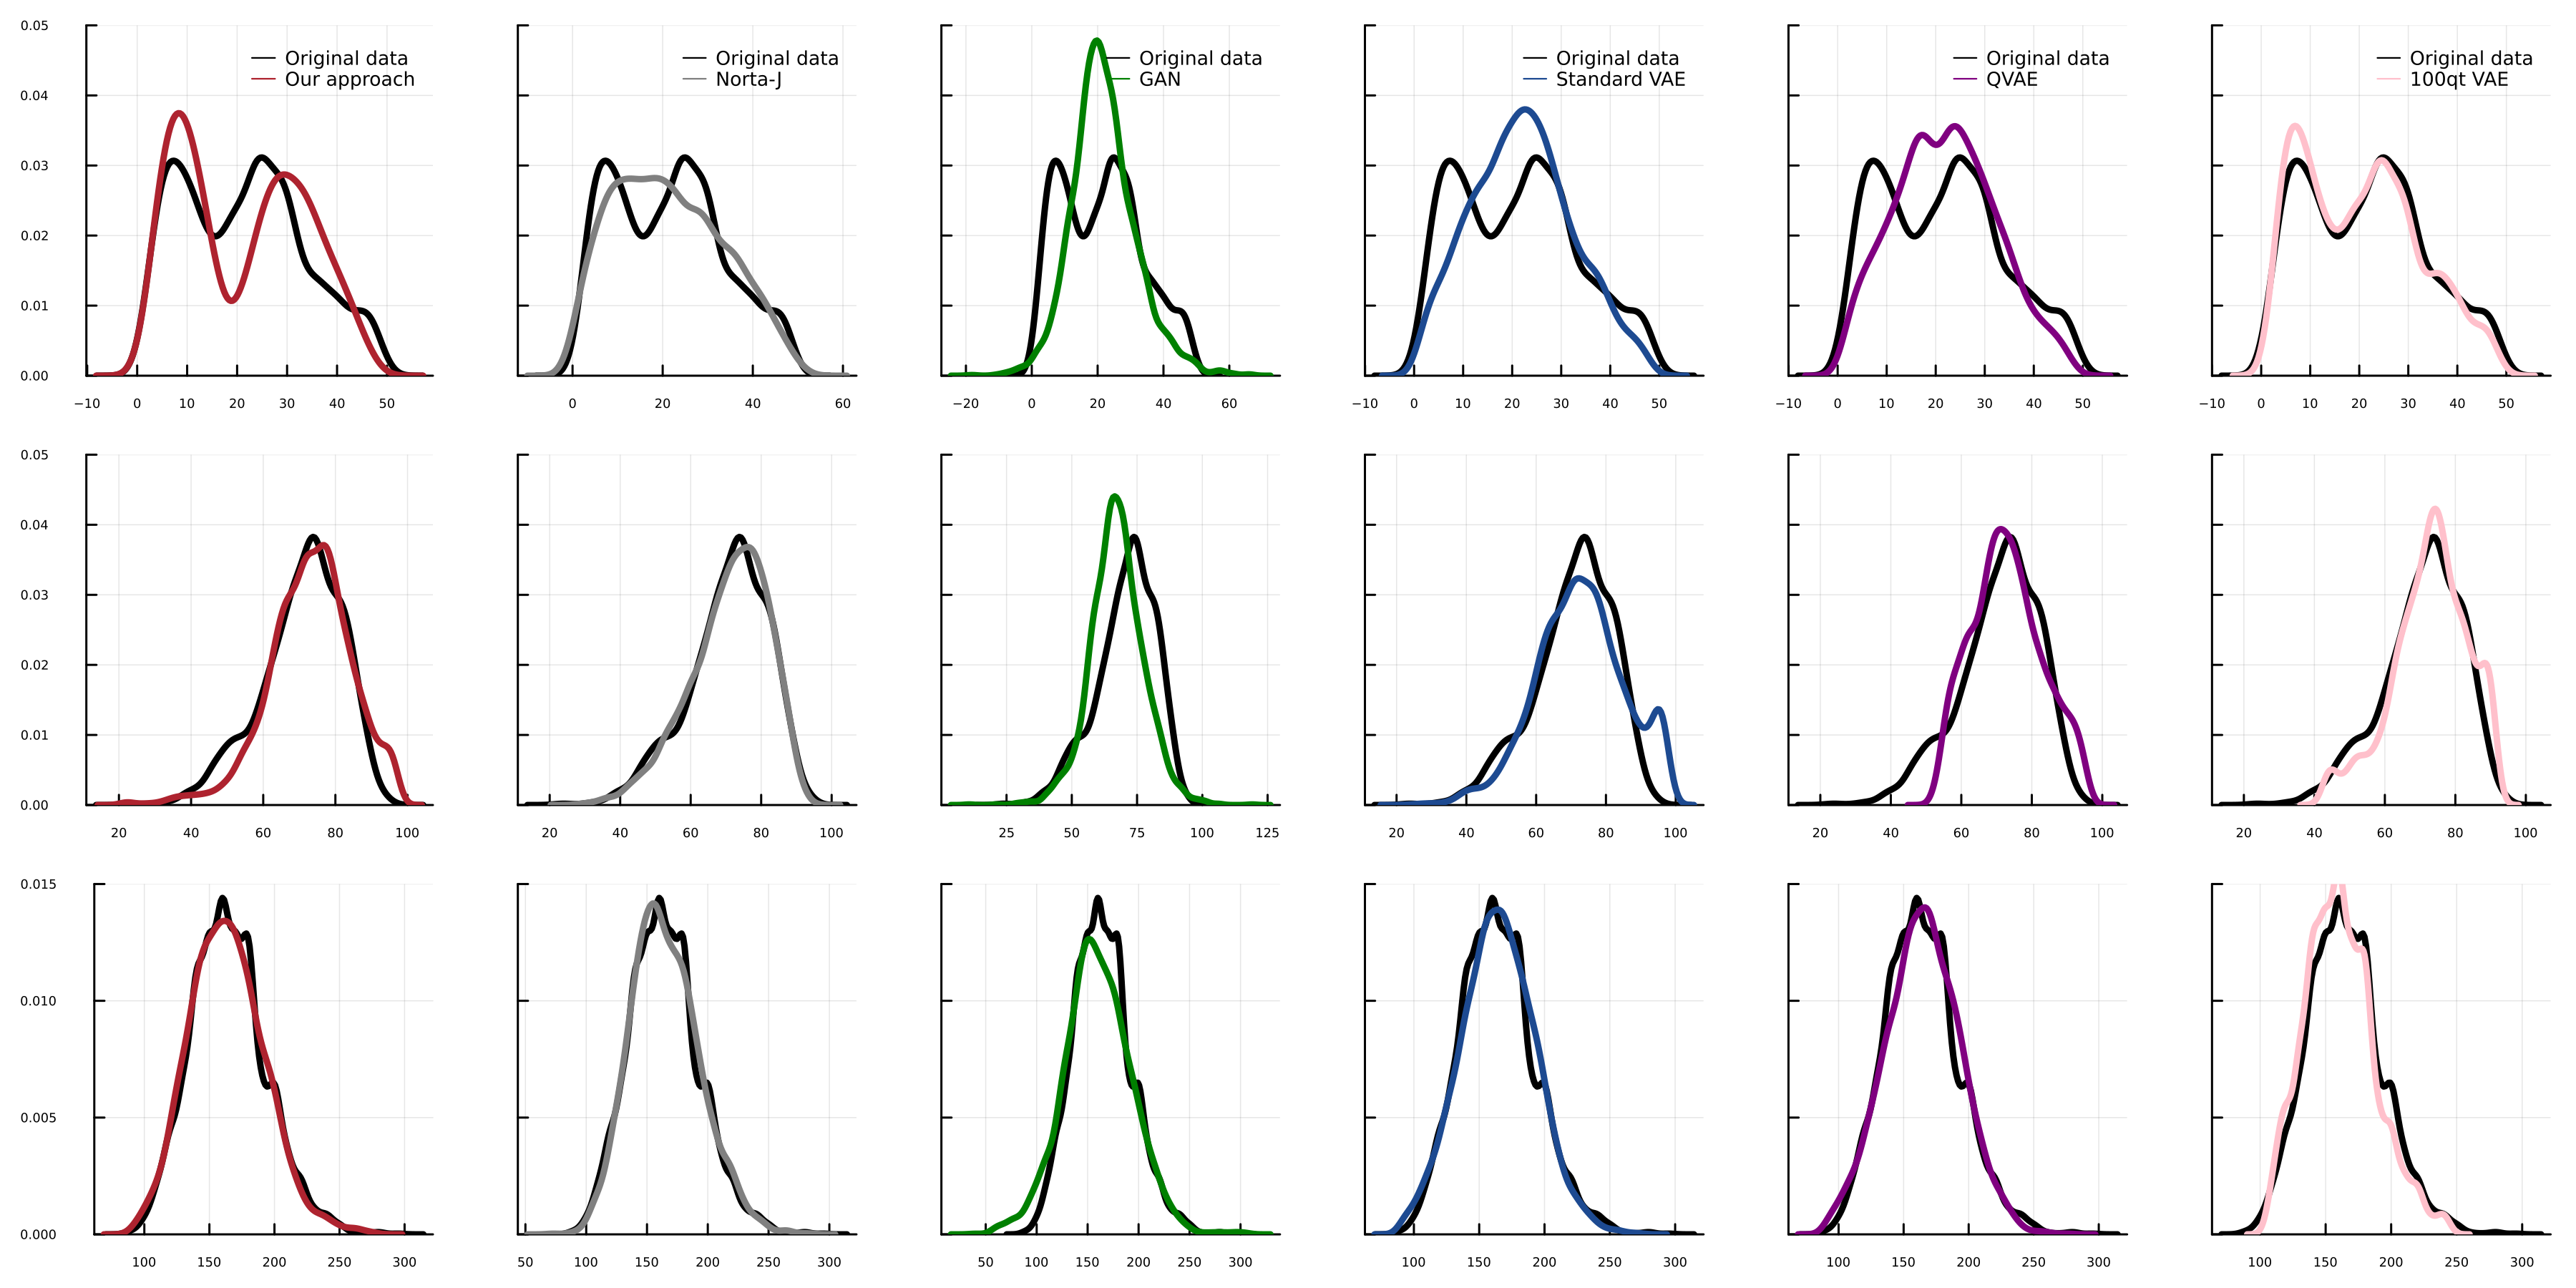

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/LatentSubgroups/figures/ist_marginal_with_q.pdf"

In [20]:
original_data_ist = Matrix(CSV.read("./data/ist_randomization_data_smaller_no_west_no_south_aug5.csv" , DataFrame))[:,1:end-2]
colnames_ist = names(CSV.read("./data/ist_randomization_data_smaller_no_west_no_south_aug5.csv" , DataFrame))
gr()
dim_number_ist= 3
dim_name_ist= colnames_ist[dim_number_ist]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p1, ptvae_syn_ist[:,dim_number_ist], label = " Our approach", color = "#AE232F", width = 3, linestyle = :solid, ylim = (0, 0.05))

p2 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p2, nortaj_syn_ist[:,dim_number_ist], label = " Norta-J", color = "gray", width = 3, linestyle = :solid, ylim = (0, 0.05), yformatter=_->"")

p3 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p3, gan_syn_ist[:,dim_number_ist], label = " GAN", color = "green", width = 3, ylim = (0, 0.05), yformatter=_->"")

p4 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p4, vae_syn_ist[:,dim_number_ist], label = " Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid, ylim = (0, 0.05), yformatter=_->"")

p5 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p5, qvae_syn_ist[:,dim_number_ist], label = " QVAE", color = "purple", width = 3, ylim = (0, 0.05), yformatter=_->"")


p6 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3,ylim =(0, 0.05))
Plots.density!(p6, q100_ptvae_syn_ist[:,dim_number_ist], label = " 100qt VAE", color = "pink", width = 3, ylim =(0, 0.05), yformatter=_->"")

p7 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3,ylim =(0, 0.05))
Plots.density!(p7, q10_ptvae_syn_ist[:,dim_number_ist], label = " 10qt VAE", color = "teal", width = 3, ylim =(0, 0.05), yformatter=_->"")


# Combine plots into a single row
combined_plot = Plots.plot(p1, p2, p3, p4, p5, p6, layout = (1, 6), size = (1200, 200), legend = :topright)



dim_number_ist= 5
dim_name_ist= colnames_ist[dim_number_ist]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p1, ptvae_syn_ist[:,dim_number_ist], label = " Our approach", color = "#AE232F", width = 3, linestyle = :solid, ylim = (0, 0.05))

p2 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p2, nortaj_syn_ist[:,dim_number_ist], label = " Norta-J", color = "gray", width = 3, linestyle = :solid, ylim = (0, 0.05), yformatter=_->"")

p3 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p3, gan_syn_ist[:,dim_number_ist], label = " GAN", color = "green", width = 3, ylim = (0, 0.05), yformatter=_->"")

p4 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p4, vae_syn_ist[:,dim_number_ist], label = " Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid, ylim = (0, 0.05), yformatter=_->"")

p5 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.05))
Plots.density!(p5, qvae_syn_ist[:,dim_number_ist], label = " QVAE", color = "purple", width = 3, ylim = (0, 0.05), yformatter=_->"")


p6 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3,ylim =(0, 0.05))
Plots.density!(p6, q100_ptvae_syn_ist[:,dim_number_ist], label = " 100qt VAE", color = "pink", width = 3, ylim =(0, 0.05), yformatter=_->"")

p7 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3,ylim =(0, 0.05))
Plots.density!(p7, q10_ptvae_syn_ist[:,dim_number_ist], label = " 10qt VAE", color = "teal", width = 3, ylim =(0, 0.05), yformatter=_->"")


# Combine plots into a single row
combined_plot_1 = Plots.plot(p1, p2, p3, p4, p5, p6,  layout = (1, 6), size = (1200, 200), legend = false)




dim_number_ist= 12
dim_name_ist= colnames_ist[dim_number_ist]  # Assuming colnames is defined elsewhere

# Create individual plots
p1 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.015))
Plots.density!(p1, ptvae_syn_ist[:,dim_number_ist], label = " Our approach", color = "#AE232F", width = 3, linestyle = :solid, ylim = (0, 0.015))

p2 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.015))
Plots.density!(p2, nortaj_syn_ist[:,dim_number_ist], label = " Norta-J", color = "gray", width = 3, linestyle = :solid, ylim = (0, 0.015), yformatter=_->"")

p3 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.015))
Plots.density!(p3, gan_syn_ist[:,dim_number_ist], label = " GAN", color = "green", width = 3, ylim = (0, 0.015), yformatter=_->"")

p4 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.015))
Plots.density!(p4, vae_syn_ist[:,dim_number_ist], label = " Standard VAE", color = "#1D4A91", width = 3, linestyle = :solid, ylim = (0, 0.015), yformatter=_->"")

p5 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3, ylim = (0, 0.015))
Plots.density!(p5, qvae_syn_ist[:,dim_number_ist], label = " QVAE", color = "purple", width = 3, ylim = (0, 0.015), yformatter=_->"")

p6 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3,ylim =(0, 0.015))
Plots.density!(p6, q100_ptvae_syn_ist[:,dim_number_ist], label = " 100qt VAE", color = "pink", width = 3, ylim =(0, 0.015), yformatter=_->"")

p7 = Plots.density(original_data_ist[:,dim_number_ist], label = " Original data" , color = "black", width = 3,ylim =(0, 0.015))
Plots.density!(p7, q10_ptvae_syn_ist[:,dim_number_ist], label = " 10qt VAE", color = "teal", width = 3, ylim =(0, 0.015), yformatter=_->"")


# Combine plots into a single row
# combined_plot_2 = Plots.plot(p1, p2, p3, p4, p5, p6, p7, layout = (1, 7), size = (1200, 200),  legend = false)
combined_plot_2 = Plots.plot(p1, p2, p3, p4, p5, p6, layout = (1, 6), size = (1200, 200),  legend = false)


# dim_number_ist= 21
# dim_name_ist= colnames[dim_number_ist]  # Assuming colnames is defined elsewhere

# # Create individual plots

# p1 = histogram_plot("", [original_data_ist[:,dim_number_ist], ptvae_syn_ist[:,dim_number_ist]], [" Original data" , " Our approach"], ["black" "#AE232F"])

# p2 = histogram_plot("",[original_data_ist[:,dim_number_ist], nortaj_syn[:,dim_number_ist]], [" Original data" , " Norta-J"], ["black" "gray"])

# p3 = histogram_plot("",[original_data_ist[:,dim_number_ist], gan_syn_ist[:,dim_number_ist]], [" Original data" , " GAN"], ["black" "green"])

# p4 = histogram_plot("",[original_data_ist[:,dim_number_ist], vae_syn_ist[:,dim_number_ist]], [" Original data" , " Standard VAE"], ["black" "#1D4A91"])

# p5 = histogram_plot("",[original_data_ist[:,dim_number_ist], qvae_syn_ist[:,dim_number_ist]], [" Original data" , " QVAE"], ["black" "purple"])

# # Combine plots into a single row
# combined_plot_3 = Plots.plot(p1, p2, p3, p4, p5, layout = (1, 5), size = (1000, 200))



combined_plot_final = Plots.plot(combined_plot, combined_plot_1, combined_plot_2, layout = (3, 1), size = (1200, 600), foreground_color_legend = nothing, background_color_legend = nothing,  dpi = 300)


Plots.plot!(xtickfont=font(4), ytickfont=font(4), legendfont=font(6))

# Display the combined plot
display(combined_plot_final)

Plots.savefig("./figures/ist_marginal_with_q.png")
Plots.savefig("./figures/ist_marginal_with_q.pdf")

In [21]:
# Set the input and output filenames
input_pdf = "./figures/ist_marginal_with_q.pdf"
output_eps = "./figures/ist_marginal_with_q.eps"

# Construct the Ghostscript command
command = `gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=$output_eps $input_pdf`

# Run the command
run(command)

GPL Ghostscript 10.01.2 (2023-06-21)
Copyright (C) 2023 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


Process(`gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=./figures/ist_marginal_with_q.eps ./figures/ist_marginal_with_q.pdf`, ProcessExited(0))